<a href="https://colab.research.google.com/github/Hayapurchase/1/blob/master/False%20News%20Detector%20using%20TFIDF%20and%20RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install datasets -q
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.1/305.1 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.9/381.9 kB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.3/60.3 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 8.0

In [ ]:
from datasets import load_dataset
import gradio as gr

dataset = load_dataset("GonzaloA/fake_news")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/huggingface_hub/repocard.py:105: UserWarning: Repo card metadata block was not found. Setting CardData to empty.
  warnings.warn("Repo card metadata block was not found. Setting CardData to empty.")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/24353 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/8117 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/8117 [00:00<?, ? examples/s]

In [ ]:
import numpy as np
import pandas as pd


In [ ]:
training_set = dataset['train']
testing_set = dataset['test']
validation_set = dataset['validation']

In [ ]:
training = pd.DataFrame(training_set)
testing = pd.DataFrame(testing_set )
validation = pd.DataFrame(validation_set)

In [ ]:
from sklearn.utils import shuffle

In [ ]:
training = shuffle(training)

In [ ]:
training

,Unnamed: 0,title,text,label
24274,24274,"China, U.S. must avoid excessive mutual suspic...",WASHINGTON (Reuters) - China and the United St...,1
14897,14897,Michael Moore Drops MAJOR Truth Bomb About Wh...,Just a few days after activist and filmmaker M...,0
16387,16387,"Fired by Trump, former Attorney Bharara launch...","NEW YORK (Reuters) - Preet Bharara, the former...",1
23276,23276,Factbox: Candidate platforms in Chile presiden...,SANTIAGO (Reuters) - Center-left Senator Aleja...,1
11518,11518,SICKENING: Donald Trump Actually Hit On A 10-...,"Donald Trump is a sexual predator, and more an...",0
...,...,...,...,...
21994,21994,Russian submarine fires cruise missiles at Isl...,MOSCOW (Reuters) - A Russian submarine on Tues...,1
10721,10721,ART OF WAR: What’s Behind Russia’s ‘Ides of Ma...,"Appear weak when you are strong, and strong w...",0
172,172,Republicans join push to lift secrecy around m...,WASHINGTON (Reuters) - Prominent Republican se...,1
12454,12454,This Third Grader OBLITERATED Donald Trump In...,When a bunch of kids were recently asked what ...,0


In [ ]:
training = training.astype({'title':'string', 'text':'string'})


In [ ]:
training.dtypes

Unnamed: 0     int64
title         string
text          string
label          int64
dtype: object

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

nltk.download('stopwords')
nltk.download('wordnet')

##initialize stopwords and lemmetizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower() #lowercase texts
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove punctations
    tokens = text.split() # split into tokens
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words] # lemmetize
    return ' '.join(tokens)# detokenize text


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
training['text'] = list(map(preprocess_text, training['text']))
testing['text'] = list(map(preprocess_text, testing['text']))
validation['text']= list(map(preprocess_text, validation['text']))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(binary = True)

In [ ]:
tf = tfidf.fit(training['text'])
x_train = tf.transform(training['text'])

In [ ]:
x_val = tf.transform(validation['text'])
x_test = tf.transform(testing['text'])

In [ ]:
x_train.shape

(24353, 166907)

In [ ]:
from sklearn.decomposition import TruncatedSVD
trunc = TruncatedSVD(500)
x_train_T = trunc.fit_transform(x_train)

In [ ]:
x_train_T_val = trunc.transform(x_val)
x_train_T_test = trunc.transform(x_test)

In [ ]:
x_train_T = np.reshape(x_train_T, (x_train_T.shape[0], 1, x_train_T.shape[1]))

In [ ]:
x_train_T_val = np.reshape(x_train_T_val, (x_train_T_val.shape[0], 1, x_train_T_val.shape[1]))
x_train_T_test = np.reshape(x_train_T_test, (x_train_T_test.shape[0], 1, x_train_T_test.shape[1]))

In [ ]:
from keras.layers import Embedding, LSTM, Dense, Dropout, Flatten

In [ ]:
from keras.models import Sequential

In [ ]:
model = Sequential()
model.add(LSTM(64, dropout=0.4, recurrent_dropout=0.4, input_shape=[1, 500], return_sequences=True))
model.add(LSTM(64, recurrent_dropout=0.4))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 1, 64)             144640    
                                                                 
 lstm_11 (LSTM)              (None, 64)                33024     
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 177,729
Trainable params: 177,729
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10)

In [ ]:
hist = model.fit(x_train_T,training['label'],batch_size=32,validation_split=0.2,epochs=30,callbacks=[early_stopping])

Epoch 1/30
609/609 [==============================] - 14s 12ms/step - loss: 0.4405 - accuracy: 0.7713 - val_loss: 0.1485 - val_accuracy: 0.9713
Epoch 2/30
609/609 [==============================] - 8s 13ms/step - loss: 0.2711 - accuracy: 0.8815 - val_loss: 0.1045 - val_accuracy: 0.9713
Epoch 3/30
609/609 [==============================] - 8s 13ms/step - loss: 0.1946 - accuracy: 0.9267 - val_loss: 0.1022 - val_accuracy: 0.9667
Epoch 4/30
609/609 [==============================] - 7s 11ms/step - loss: 0.1728 - accuracy: 0.9353 - val_loss: 0.0914 - val_accuracy: 0.9719
Epoch 5/30
609/609 [==============================] - 8s 14ms/step - loss: 0.1713 - accuracy: 0.9347 - val_loss: 0.0870 - val_accuracy: 0.9717
Epoch 6/30
609/609 [==============================] - 7s 11ms/step - loss: 0.1623 - accuracy: 0.9385 - val_loss: 0.0821 - val_accuracy: 0.9741
Epoch 7/30
609/609 [==============================] - 8s 14ms/step - loss: 0.1571 - accuracy: 0.9386 - val_loss: 0.0791 - val_accuracy: 0.974

In [ ]:
y_pred = model.predict(x_train_T_test)
y_pred = np.around(y_pred)

254/254 [==============================] - 73s 4ms/step


In [ ]:
testing["prediction"]=y_pred

In [ ]:
v_pred = model.predict(x_train_T_val)
v_pred = np.around(v_pred)

254/254 [==============================] - 1s 4ms/step


In [ ]:
validation["prediction"]=v_pred
validation

,Unnamed: 0,title,text,label,prediction
0,0,Trump says to spend extra day in Philippines d...,washington reuters president donald trump said...,1,1.0
1,1,Fire in Bangladesh textile factory kills six,dhaka reuters fire textile factory bangladesh ...,1,1.0
2,2,Myanmar army drops charges against six journal...,yangon reuters myanmar military friday dropped...,1,1.0
3,3,Mentally-Ill Mother Shoots Sleeping Five-Year...,warning sign everywherefortyoneyearold sara at...,0,0.0
4,4,No formal U.S. delegation to Castro memorial: ...,washington reuters united state send president...,1,1.0
...,...,...,...,...,...
8112,8112,Boiler Room #92 – The (Hollywood) Hills Have Eyes,tune alternate current radio network acr anoth...,0,0.0
8113,8113,Putin: restriction on Russian media is attack ...,danang vietnam reuters russian president vladi...,1,1.0
8114,8114,REVENGE ATTACK ON MUSLIMS: VAN PLOWS INTO CROW...,revenge attack london scene terror time took p...,0,0.0
8115,8115,This Mainstream News Organization Thinks Trum...,always known republican party filled xenophobi...,0,0.0


In [ ]:
print(validation['text'].loc[3])

warning sign everywherefortyoneyearold sara atkinson stopped taking medication according family member growing increasingly paranoid claimed bomb planted home thought camera hidden inside fiveyearold son shoesat one point atkinson threatened kill take son hershortly kenny kreuscher mother put 22 rifle head lay sleeping little boy told father mommy punched himken kreuscher sr recorded conversation son documenting mark left child mentally ill mother hoping someone would interveneover course past year ken kreuscher filed numerous police report contacted child protective service multiple time gone court try get order protection telling everyone court possibility would happen kreuscher said interview denver kdvr march 11but kreuscher raised alarm noone intervened son behalfat beginning march colorado mother left state kenny traveling roundup montanaon march 5 still montana shot little boy sleep turned gun herselfthe fiveyearold died 12 hour laterhere story kusathere fine line violating righ

In [ ]:
loss, acc = model.evaluate(x_train_T_test,testing['label'])
print(loss)
print(acc)

254/254 [==============================] - 1s 4ms/step - loss: 0.0840 - accuracy: 0.9691
0.08397036045789719
0.9690772294998169


In [ ]:
import matplotlib.pyplot as plt

def plot(history,string):
  plt.plot(history.history[string])
  plt.xlabel('epochs')
  plt.ylabel(string)
  plt.show()

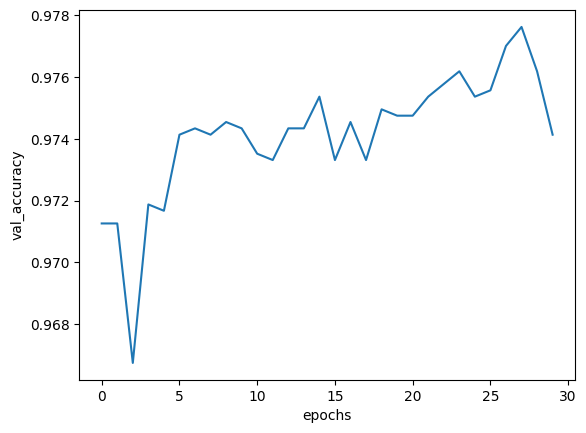

In [ ]:
plot(hist,'val_accuracy')

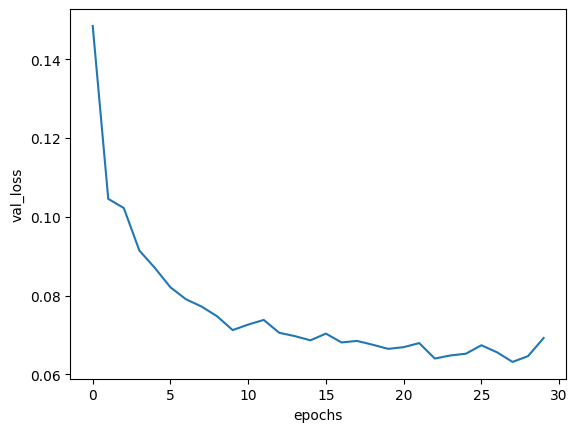

In [ ]:
plot(hist,'val_loss')

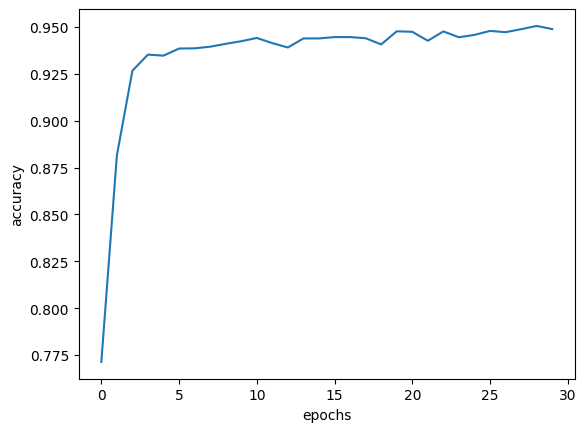

In [ ]:
plot(hist,'accuracy')

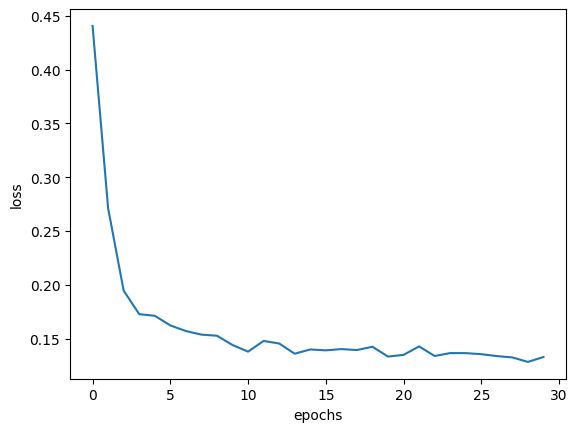

In [ ]:
plot(hist,'loss')

In [ ]:
model.save('LSTM.h5')

In [ ]:
from tensorflow.keras.models import load_model
modelo = load_model('LSTM.h5')

def fakeNEWS(text):
  text = list(map(preprocess_text, [text]))
  tf = tfidf.transform(text)
  inp_tf = trunc.transform(tf)

  inp_tf = np.reshape(inp_tf, (inp_tf.shape[0], 1, inp_tf.shape[1]))

  pred=modelo.predict(inp_tf)


  if pred[0][0] > 0.5:
    return 'True News'
  else:
    return 'False News'



In [ ]:
demo = gr.Interface(
    fn=fakeNEWS,
    inputs=["text"],
    outputs=["text"],
    title = "FAKE NEWS DETECTION MODEL"
)

demo.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://290161fd154c5d743c.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

testing['prediction']=le.fit_transform(testing['prediction'])

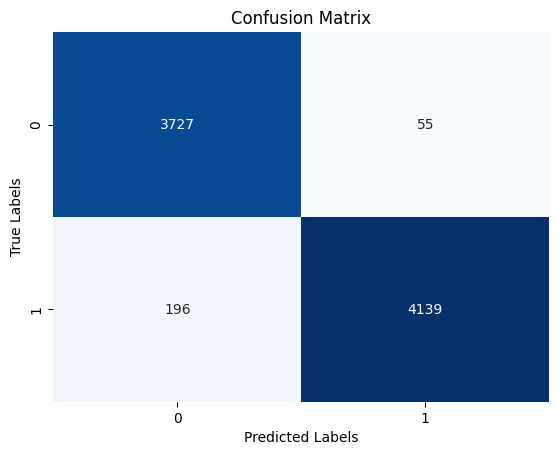

In [ ]:
cm = confusion_matrix(testing['label'], testing['prediction'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()


In [ ]:
testing

,Unnamed: 0,title,text,label,prediction
0,0,FORMER U.S. ATTORNEY: “It’s VERY Clear Intel C...,joe digenova around dc decade seen probably se...,0,0
1,1,Rick Santorum Advises President To Quit Tweet...,recent interview cnn former senator republican...,0,0
2,2,Stephen Colbert Explains The Horrifying Futur...,three clown left gop clown car republican ever...,0,0
3,3,Nepal votes in final round of polls at the end...,kathmandu reuters nepali began voting final ro...,1,1
4,4,"More Americans think wealthy, not middle class...",washington reuters american likely believe wea...,1,1
...,...,...,...,...,...
8112,8112,Opposition leader says Brexit must not be used...,brussels reuters jeremy corbyn leader british ...,1,1
8113,8113,‘Pro-Life’ Scott Walker Just Signed Two Bills...,republican always talk big game prolife one wa...,0,0
8114,8114,LIBERAL HUMOR? FLORIDA BAR POSTS SIGN Suggesti...,federal offense threaten presidential candidat...,0,0
8115,8115,New York protesters camp out at Goldman Sachs ...,new york reuters dozen protester gathered outs...,1,1


In [ ]:
validation

,Unnamed: 0,title,text,label,prediction
0,0,Trump says to spend extra day in Philippines d...,washington reuters president donald trump said...,1,1.0
1,1,Fire in Bangladesh textile factory kills six,dhaka reuters fire textile factory bangladesh ...,1,1.0
2,2,Myanmar army drops charges against six journal...,yangon reuters myanmar military friday dropped...,1,1.0
3,3,Mentally-Ill Mother Shoots Sleeping Five-Year...,warning sign everywherefortyoneyearold sara at...,0,0.0
4,4,No formal U.S. delegation to Castro memorial: ...,washington reuters united state send president...,1,1.0
...,...,...,...,...,...
8112,8112,Boiler Room #92 – The (Hollywood) Hills Have Eyes,tune alternate current radio network acr anoth...,0,0.0
8113,8113,Putin: restriction on Russian media is attack ...,danang vietnam reuters russian president vladi...,1,1.0
8114,8114,REVENGE ATTACK ON MUSLIMS: VAN PLOWS INTO CROW...,revenge attack london scene terror time took p...,0,0.0
8115,8115,This Mainstream News Organization Thinks Trum...,always known republican party filled xenophobi...,0,0.0
